In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import pickle
import mysql.connector


In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\Matiks\Matiks - Data Analyst Data.xlsx")
df.head(3)

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,...,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,...,38.41,6,27.50,2025-05-19,Silver,Social Media,Co-op,Bronze,8721,155
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,...,129.02,10,2.50,2025-05-12,Gold,Ads,Solo,Bronze,3572,431
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,brownchris,mnichols@mcmillan.net,2023-10-19,Ireland,36,Female,PC,QuestRaid,12,...,62.50,5,25.56,2025-05-03,Silver,Organic,Solo,Platinum,1060,562


In [3]:
df.size

186984

In [4]:
print(f"Rows : {df.shape[0]}, Columns : {df.shape[1]}")

Rows : 8904, Columns : 21


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

User_ID                     0
Username                    0
Email                       0
Signup_Date                 0
Country                     0
Age                         0
Gender                      0
Device_Type                 0
Game_Title                  0
Total_Play_Sessions         0
Avg_Session_Duration_Min    0
Total_Hours_Played          0
In_Game_Purchases_Count     0
Total_Revenue_USD           0
Last_Login                  0
Subscription_Tier           0
Referral_Source             0
Preferred_Game_Mode         0
Rank_Tier                   0
Achievement_Score           0
Active_time                 0
dtype: int64

In [7]:
df.head(2)

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,...,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,...,38.41,6,27.50,2025-05-19,Silver,Social Media,Co-op,Bronze,8721,155
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,...,129.02,10,2.50,2025-05-12,Gold,Ads,Solo,Bronze,3572,431


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8904 entries, 0 to 8903
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   8904 non-null   object 
 1   Username                  8904 non-null   object 
 2   Email                     8904 non-null   object 
 3   Signup_Date               8904 non-null   object 
 4   Country                   8904 non-null   object 
 5   Age                       8904 non-null   int64  
 6   Gender                    8904 non-null   object 
 7   Device_Type               8904 non-null   object 
 8   Game_Title                8904 non-null   object 
 9   Total_Play_Sessions       8904 non-null   int64  
 10  Avg_Session_Duration_Min  8904 non-null   float64
 11  Total_Hours_Played        8904 non-null   float64
 12  In_Game_Purchases_Count   8904 non-null   int64  
 13  Total_Revenue_USD         8904 non-null   float64
 14  Last_Log

In [9]:
num_cols = df.select_dtypes(include='number')
num_cols.head(2)

,Age,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Achievement_Score,Active_time
0,22,21,5.78,38.41,6,27.50,8721,155
1,22,22,32.53,129.02,10,2.50,3572,431


In [10]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head(2)

,User_ID,Username,Email,Signup_Date,Country,Gender,Device_Type,Game_Title,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,2024-12-15,Austria,Other,Mobile,MysticWar,2025-05-19,Silver,Social Media,Co-op,Bronze
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,2024-03-07,Gabon,Other,PC,QuestRaid,2025-05-12,Gold,Ads,Solo,Bronze


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8904.00,31.16,10.67,13.00,22.00,31.00,41.00,49.00
Total_Play_Sessions,8904.00,19.94,4.28,9.00,17.00,20.00,23.00,31.00
Avg_Session_Duration_Min,8904.00,30.05,9.82,2.85,23.32,29.91,36.84,57.30
Total_Hours_Played,8904.00,100.62,47.87,0.00,66.23,99.97,133.83,234.89
In_Game_Purchases_Count,8904.00,4.89,2.12,0.00,3.00,5.00,6.00,10.00
Total_Revenue_USD,8904.00,39.18,31.32,0.00,13.55,30.82,58.30,124.99
Achievement_Score,8904.00,5005.86,2890.91,0.00,2486.00,5073.50,7484.25,9997.00
Active_time,8904.00,346.84,210.44,-29.00,164.00,345.00,526.00,729.00


In [12]:
df['Avg_Session_Duration_Min'] = df['Avg_Session_Duration_Min'].apply(lambda x: abs(x))
df['Total_Hours_Played'] = df['Total_Hours_Played'].apply(lambda x: abs(x))

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8904.00,31.16,10.67,13.00,22.00,31.00,41.00,49.00
Total_Play_Sessions,8904.00,19.94,4.28,9.00,17.00,20.00,23.00,31.00
Avg_Session_Duration_Min,8904.00,30.05,9.82,2.85,23.32,29.91,36.84,57.30
Total_Hours_Played,8904.00,100.62,47.87,0.00,66.23,99.97,133.83,234.89
In_Game_Purchases_Count,8904.00,4.89,2.12,0.00,3.00,5.00,6.00,10.00
Total_Revenue_USD,8904.00,39.18,31.32,0.00,13.55,30.82,58.30,124.99
Achievement_Score,8904.00,5005.86,2890.91,0.00,2486.00,5073.50,7484.25,9997.00
Active_time,8904.00,346.84,210.44,-29.00,164.00,345.00,526.00,729.00


In [14]:
df.head(2)

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,...,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,...,38.41,6,27.50,2025-05-19,Silver,Social Media,Co-op,Bronze,8721,155
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,...,129.02,10,2.50,2025-05-12,Gold,Ads,Solo,Bronze,3572,431


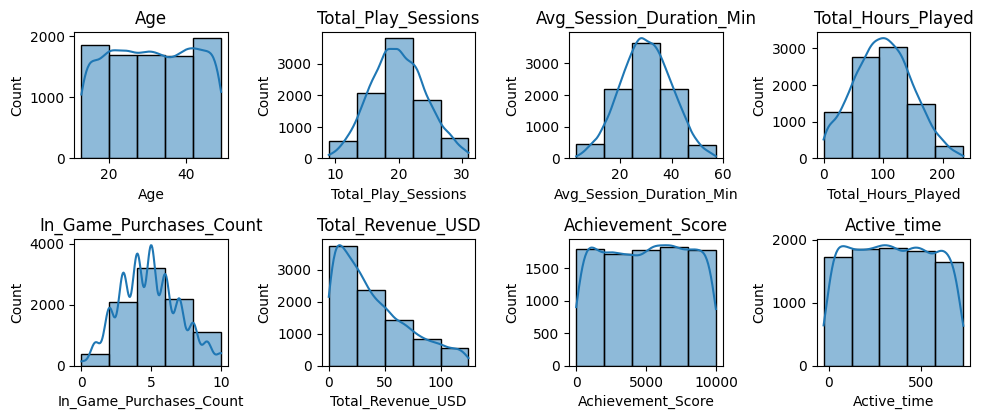

In [15]:
## Data Distribution:
plt.figure(figsize=(10,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.histplot(data = df,x = df[col],bins = 5 ,kde = True)
    plt.title(col)
plt.tight_layout()
plt.show()

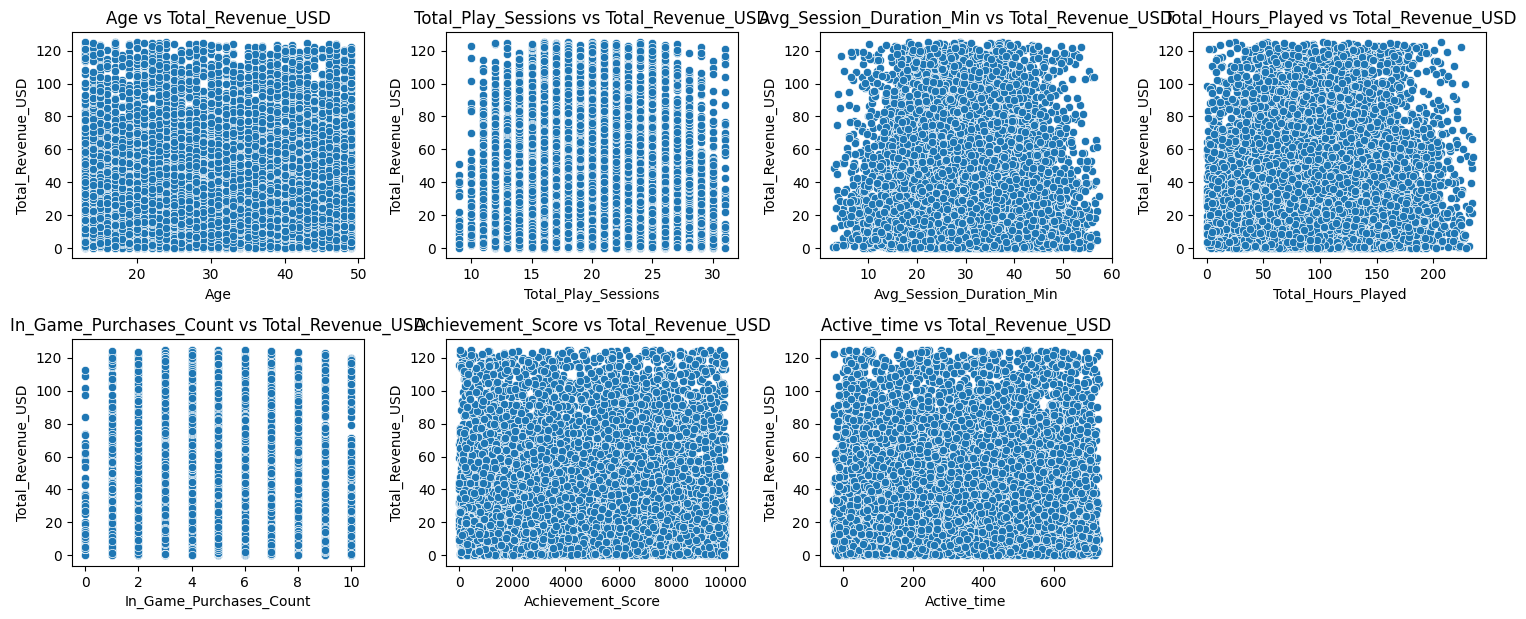

In [16]:
## Relationship between features:
plt.figure(figsize=(15,12))
for i,col in enumerate(num_cols.drop('Total_Revenue_USD',axis=1),1):
    plt.subplot(4,4,i)
    sns.scatterplot(data = df, x= df[col] ,y = df['Total_Revenue_USD'])
    plt.title(f"{col} vs Total_Revenue_USD")
plt.tight_layout()
plt.show()
    

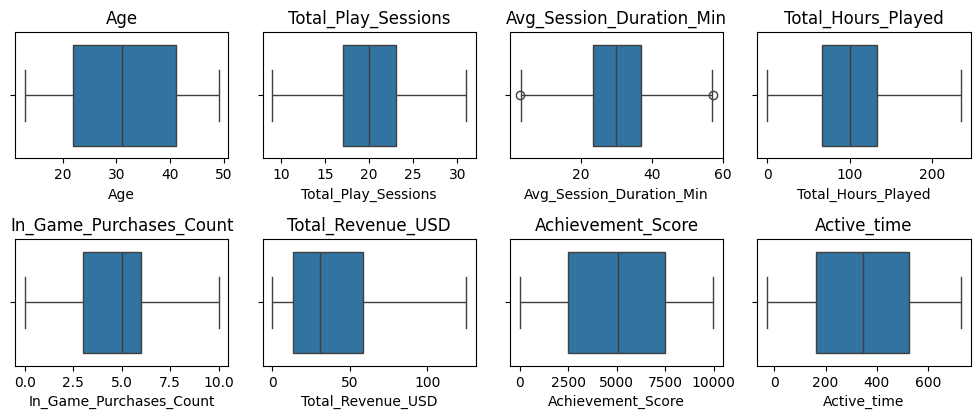

In [17]:
## Outliers:
plt.figure(figsize=(10,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df,x= df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Outliers Removal

In [18]:
num_cols.columns

Index(['Age', 'Total_Play_Sessions', 'Avg_Session_Duration_Min',
       'Total_Hours_Played', 'In_Game_Purchases_Count', 'Total_Revenue_USD',
       'Achievement_Score', 'Active_time'],
      dtype='object')

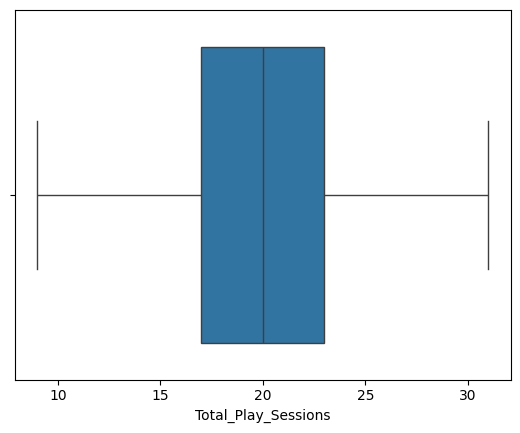

In [19]:
sns.boxplot(data = df, x = df['Total_Play_Sessions'])
plt.show()

In [20]:
q1 = df['Total_Play_Sessions'].quantile(0.25)
q3 = df['Total_Play_Sessions'].quantile(0.75)
iqr = q3 - q1
print(f" Q1 : {q1}, Q3 :{q3}, IQR : {iqr}")

 Q1 : 17.0, Q3 :23.0, IQR : 6.0


In [21]:
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(f"Lower_fence : {lf}, Upper_fence:{uf}")

Lower_fence : 8.0, Upper_fence:32.0


In [22]:
df = df[df['Total_Play_Sessions']>lf]

In [23]:
df= df[df['Total_Play_Sessions']<uf]

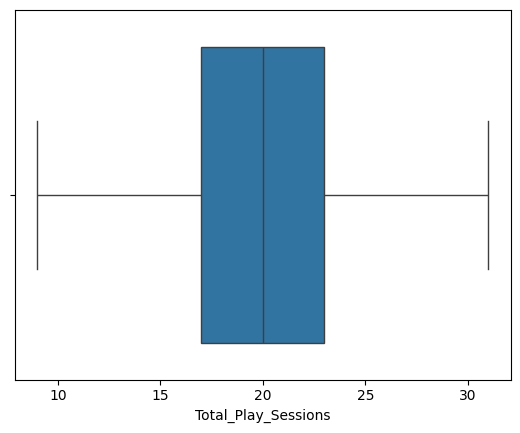

In [24]:
sns.boxplot(data = df, x= df['Total_Play_Sessions'])
plt.show()

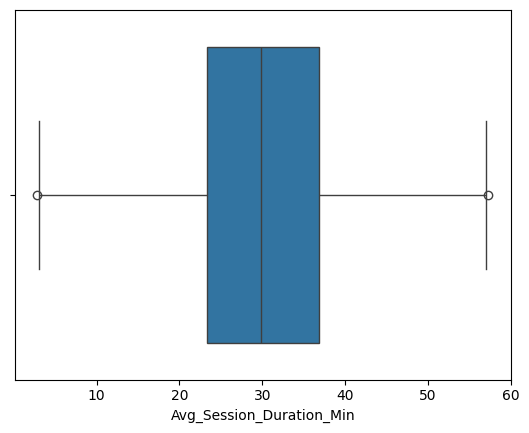

In [25]:
sns.boxplot(data = df,x = df['Avg_Session_Duration_Min'])
plt.show()

In [26]:
q1 = df['Avg_Session_Duration_Min'].quantile(0.25)
q3 = df['Avg_Session_Duration_Min'].quantile(0.75)
iqr = q3 - q1
print(f"Q1:{q1},Q3:{q3},IQR:{iqr}")

Q1:23.32,Q3:36.8425,IQR:13.5225


In [27]:
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(f"Lower_fence : {lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence : 3.04,Upper_fence:57.13


In [28]:
df = df[df['Avg_Session_Duration_Min']>lf]

In [29]:
df = df[df['Avg_Session_Duration_Min']<uf]

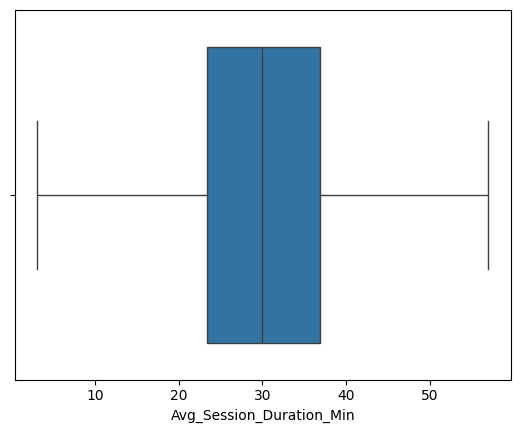

In [30]:
sns.boxplot(data=df,x= df['Avg_Session_Duration_Min'])
plt.show()

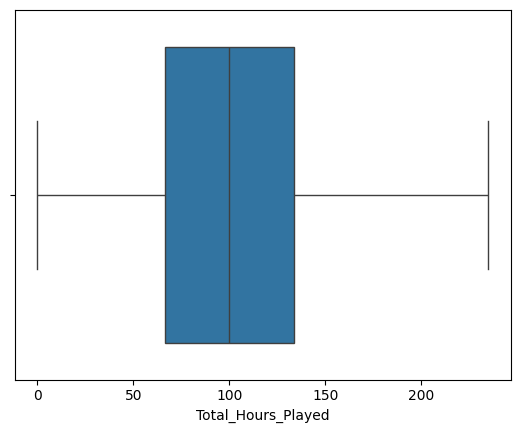

In [31]:
sns.boxplot(data = df,x= df['Total_Hours_Played'])
plt.show()

In [32]:
q1 = df['Total_Hours_Played'].quantile(0.25)
q3 = df['Total_Hours_Played'].quantile(0.75)
iqr = q3 - q1
print(f"Q1:{q1},Q3:{q3},IQR:{iqr:.2f}")

Q1:66.235,Q3:133.83,IQR:67.60


In [33]:
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(f"Lower_fence:{lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence:-35.16,Upper_fence:235.22


In [34]:
df = df[df['Total_Hours_Played']<uf]

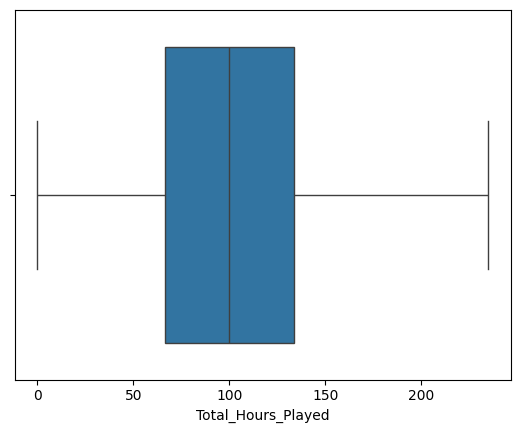

In [35]:
sns.boxplot(data =df,x=df['Total_Hours_Played'])
plt.show()

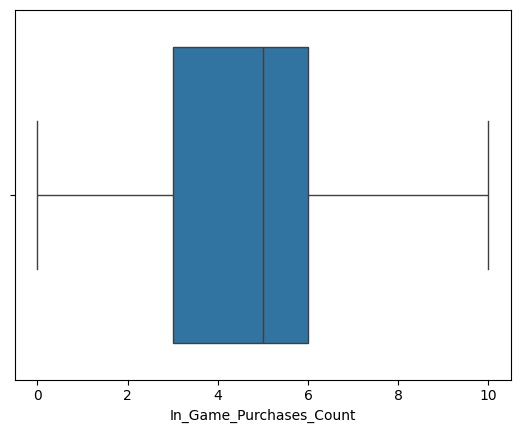

In [36]:
sns.boxplot(data = df, x = df['In_Game_Purchases_Count'])
plt.show()

In [37]:
q1 = df['In_Game_Purchases_Count'].quantile(0.25)
q3 = df['In_Game_Purchases_Count'].quantile(0.75)
iqr = q3 - q1
print(f"Q1:{q1},Q3:{q3},IQR:{iqr}")

Q1:3.0,Q3:6.0,IQR:3.0


In [38]:
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(f"Lower_fence:{lf},Upper_fence:{uf}")

Lower_fence:-1.5,Upper_fence:10.5


In [39]:
df = df[df['In_Game_Purchases_Count']<uf]

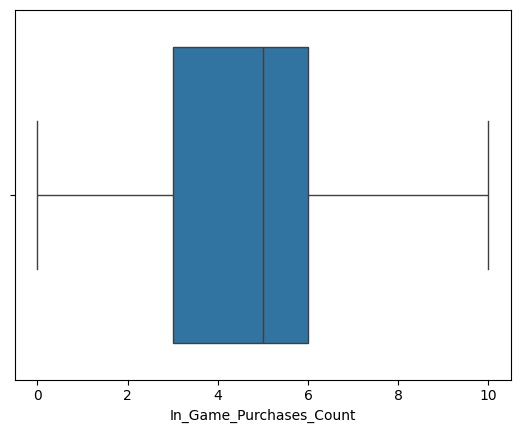

In [40]:
sns.boxplot(data=df,x=df['In_Game_Purchases_Count'])
plt.show()

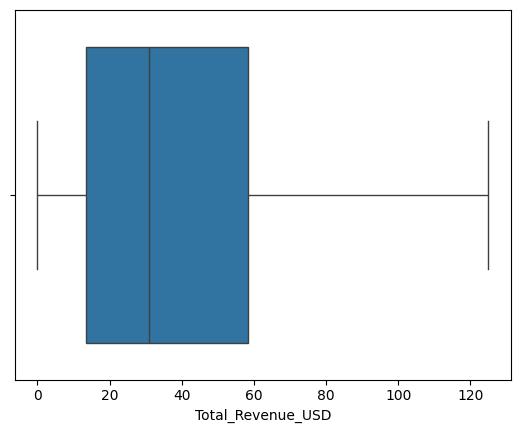

In [41]:
sns.boxplot(data=df,x= df['Total_Revenue_USD'])
plt.show()

In [42]:
q1 = df['Total_Revenue_USD'].quantile(0.25)
q3 = df['Total_Revenue_USD'].quantile(0.75)
iqr = q3 - q1
print(f"Q1:{q1},Q3:{q3:.2f},IQR:{iqr:.2f}")

Q1:13.5525,Q3:58.30,IQR:44.75


In [43]:
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(f"Lower_fence:{lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence:-53.57,Upper_fence:125.42


In [44]:
df = df[df['Total_Revenue_USD']<uf]

In [45]:
df = df[df['Total_Revenue_USD']<125]

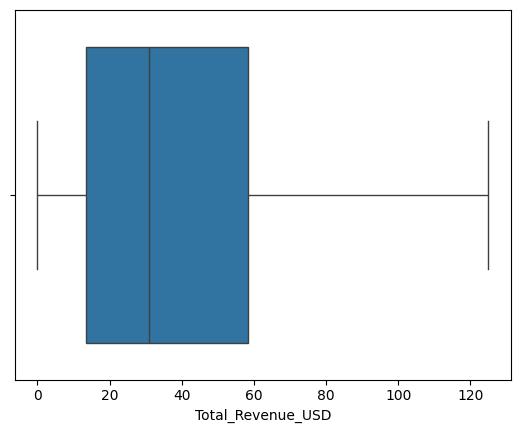

In [46]:
sns.boxplot(data=df,x=df['Total_Revenue_USD'])
plt.show()

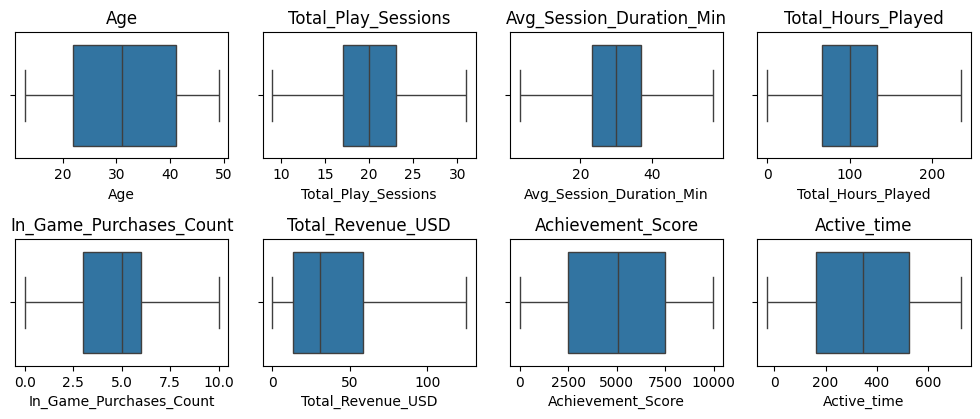

In [47]:
## After removal of Outliers:
plt.figure(figsize=(10,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df,x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [48]:
df.head(2)

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,...,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,...,38.41,6,27.50,2025-05-19,Silver,Social Media,Co-op,Bronze,8721,155
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,...,129.02,10,2.50,2025-05-12,Gold,Ads,Solo,Bronze,3572,431


In [49]:
#df.to_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\Matiks\matiks_new.csv",index=False)

In [50]:
df_new=pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\Matiks\matiks_new.csv")
df_new.head(2)

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,...,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,...,38.41,6,27.50,2025-05-19,Silver,Social Media,Co-op,Bronze,8721,155
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,...,129.02,10,2.50,2025-05-12,Gold,Ads,Solo,Bronze,3572,431


In [51]:
df.head(2)

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,...,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,...,38.41,6,27.50,2025-05-19,Silver,Social Media,Co-op,Bronze,8721,155
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,...,129.02,10,2.50,2025-05-12,Gold,Ads,Solo,Bronze,3572,431


In [52]:
df.columns

Index(['User_ID', 'Username', 'Email', 'Signup_Date', 'Country', 'Age',
       'Gender', 'Device_Type', 'Game_Title', 'Total_Play_Sessions',
       'Avg_Session_Duration_Min', 'Total_Hours_Played',
       'In_Game_Purchases_Count', 'Total_Revenue_USD', 'Last_Login',
       'Subscription_Tier', 'Referral_Source', 'Preferred_Game_Mode',
       'Rank_Tier', 'Achievement_Score', 'Active_time'],
      dtype='object')

In [53]:
## Removal of unwatnted columns for ML
df.drop(columns=['User_ID','Username','Email','Signup_Date','Last_Login'],inplace=True)

In [54]:
df.columns

Index(['Country', 'Age', 'Gender', 'Device_Type', 'Game_Title',
       'Total_Play_Sessions', 'Avg_Session_Duration_Min', 'Total_Hours_Played',
       'In_Game_Purchases_Count', 'Total_Revenue_USD', 'Subscription_Tier',
       'Referral_Source', 'Preferred_Game_Mode', 'Rank_Tier',
       'Achievement_Score', 'Active_time'],
      dtype='object')

In [55]:
df.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,Silver,Social Media,Co-op,Bronze,8721,155
1,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,Gold,Ads,Solo,Bronze,3572,431


In [56]:
cat_cols.columns

Index(['User_ID', 'Username', 'Email', 'Signup_Date', 'Country', 'Gender',
       'Device_Type', 'Game_Title', 'Last_Login', 'Subscription_Tier',
       'Referral_Source', 'Preferred_Game_Mode', 'Rank_Tier'],
      dtype='object')

In [57]:
country_list = df['Country'].unique().tolist()

In [58]:
gender_list = df['Gender'].unique().tolist()

In [59]:
device_list = df['Device_Type'].unique().tolist()

In [60]:
game_list = df['Game_Title'].unique().tolist()

In [61]:
subscription_list = df['Subscription_Tier'].unique().tolist()

In [62]:
referral_list = df['Referral_Source'].unique().tolist()

In [63]:
game_mode_list = df['Preferred_Game_Mode'].unique().tolist()

In [64]:
rank_tier_list = df['Rank_Tier'].unique().tolist()

In [ ]:
coun_list = {col:i for i,col in enumerate(country_list,1)}
coun_list

In [ ]:
rev_count_list = {i:col for i,col in enumerate(country_list,1)}
rev_count_list

In [67]:
gender_dic = {key :i for i,key in enumerate(gender_list,1)}
gender_dic

{'Other': 1, 'Female': 2, 'Male': 3}

In [68]:
rev_gender_dic = {i:col for i,col in enumerate(gender_list,1)}
rev_gender_dic

{1: 'Other', 2: 'Female', 3: 'Male'}

In [69]:
device_dic = {key : i for i,key in enumerate(device_list,1)}
device_dic

{'Mobile': 1, 'PC': 2, 'Console': 3}

In [70]:
rev_device_dic = {i:col for i,col in enumerate(device_list,1)}
rev_device_dic

{1: 'Mobile', 2: 'PC', 3: 'Console'}

In [71]:
game_dic = {key : i for i,key in enumerate(game_list,1)}
game_dic

{'MysticWar': 1, 'QuestRaid': 2, 'BattleZone': 3, 'SpeedRun': 4}

In [72]:
rev_game_dic = {i:col for i,col in enumerate(game_list,1)}
rev_game_dic

{1: 'MysticWar', 2: 'QuestRaid', 3: 'BattleZone', 4: 'SpeedRun'}

In [73]:
sub_dic = { key : i for i,key in enumerate(subscription_list,1)}
sub_dic

{'Silver': 1, 'Gold': 2, 'Free': 3, 'Platinum': 4}

In [74]:
rev_sub_dic = {i:col for i,col in enumerate(subscription_list,1)}
rev_sub_dic

{1: 'Silver', 2: 'Gold', 3: 'Free', 4: 'Platinum'}

In [75]:
referral_dic = {key:i for i,key in enumerate(referral_list,1)}
referral_dic

{'Social Media': 1, 'Ads': 2, 'Organic': 3, 'Friend': 4}

In [76]:
rev_referral_dic = {i:col for i,col in enumerate(referral_list,1)}
rev_referral_dic

{1: 'Social Media', 2: 'Ads', 3: 'Organic', 4: 'Friend'}

In [77]:
game_mode_dic ={ key:i for i,key in enumerate(game_mode_list,1)}
game_mode_dic

{'Co-op': 1, 'Solo': 2, 'Multiplayer': 3}

In [78]:
rev_game_mode_dic = {i:col for i,col in enumerate(game_mode_list,1)}
rev_game_mode_dic

{1: 'Co-op', 2: 'Solo', 3: 'Multiplayer'}

In [79]:
rank_tier_dic = {key : i for i, key in enumerate(rank_tier_list,1)}
rank_tier_dic

{'Bronze': 1, 'Platinum': 2, 'Diamond': 3, 'Gold': 4, 'Silver': 5}

In [80]:
rev_rank_tier_dic = {i:col for i,col in enumerate(rank_tier_list,1)}
rev_rank_tier_dic

{1: 'Bronze', 2: 'Platinum', 3: 'Diamond', 4: 'Gold', 5: 'Silver'}

In [82]:
df['Country'] = df['Country'].map(coun_list)

In [83]:
df['Gender'] = df['Gender'].map(gender_dic)
df['Device_Type'] = df['Device_Type'].map(device_dic)
df['Game_Title'] = df['Game_Title'].map(game_dic)
df['Subscription_Tier'] =df ['Subscription_Tier'].map(sub_dic)
df['Referral_Source'] =df['Referral_Source'].map(referral_dic)
df['Preferred_Game_Mode'] =df['Preferred_Game_Mode'].map(game_mode_dic)
df['Rank_Tier'] =df['Rank_Tier'].map(rank_tier_dic)

In [84]:
df.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,1,22,1,1,1,21,5.78,38.41,6,27.50,1,1,1,1,8721,155
1,2,22,1,2,2,22,32.53,129.02,10,2.50,2,2,2,1,3572,431


## Revenue Prediction:

In [ ]:
x = df.drop('Total_Revenue_USD',axis=1)
y = df['Total_Revenue_USD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

models = LazyRegressor()

models,predictions = models.fit(x_train,x_test,y_train,y_test)

models

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [01:05<00:00,  1.55s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 7121, number of used features: 15
[LightGBM] [Info] Start training from score 39.337373


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ElasticNet,-0.01,-0.00,31.22,0.03
DummyRegressor,-0.01,-0.00,31.22,0.02
LassoLarsIC,-0.01,-0.00,31.22,0.05
LassoLars,-0.01,-0.00,31.22,0.01
Lasso,-0.01,-0.00,31.22,0.02
BayesianRidge,-0.01,-0.00,31.22,0.05
ElasticNetCV,-0.01,-0.00,31.22,0.13
LassoCV,-0.01,-0.00,31.22,0.15
LassoLarsCV,-0.01,-0.00,31.22,0.06


In [86]:
x = df.drop('Total_Revenue_USD',axis=1)
y = df['Total_Revenue_USD']

models = [LinearRegression(),DecisionTreeRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),
          RandomForestRegressor(),Lasso(),Ridge()]
for model in models:
    model.fit(x,y)
    pred = model.predict(x)
    print(type(model).__name__.center(50))
    print(f"MSE : {mean_squared_error(y,pred):.2f}")
    print(f"RMSE :{root_mean_squared_error(y,pred):.2f}")
    print(f"MAE : {mean_absolute_error(y,pred):.2f}")

                 LinearRegression                 
MSE : 979.46
RMSE :31.30
MAE : 25.74
              DecisionTreeRegressor               
MSE : 0.00
RMSE :0.00
MAE : 0.00
                AdaBoostRegressor                 
MSE : 1008.67
RMSE :31.76
MAE : 27.03
            GradientBoostingRegressor             
MSE : 921.55
RMSE :30.36
MAE : 24.91
              RandomForestRegressor               
MSE : 142.78
RMSE :11.95
MAE : 9.80
                      Lasso                       
MSE : 979.90
RMSE :31.30
MAE : 25.74
                      Ridge                       
MSE : 979.46
RMSE :31.30
MAE : 25.74


In [87]:
x = df.drop('Total_Revenue_USD',axis=1)
y = df['Total_Revenue_USD']

model = RandomForestRegressor()
model.fit(x,y)

df['Predicted_Revenue'] = model.predict(x)

In [88]:
df.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time,Predicted_Revenue
0,1,22,1,1,1,21,5.78,38.41,6,27.50,1,1,1,1,8721,155,37.01
1,2,22,1,2,2,22,32.53,129.02,10,2.50,2,2,2,1,3572,431,16.75


In [89]:
df[['Total_Revenue_USD','Predicted_Revenue']].sample(5)

,Total_Revenue_USD,Predicted_Revenue
6593,30.98,33.36
618,50.26,48.47
1591,30.51,36.52
7779,8.10,19.74
5900,25.90,31.27


## Classification:

In [90]:
x = df.drop(columns=['Subscription_Tier','Predicted_Revenue'],axis=1)
y = df['Subscription_Tier']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

models = LazyClassifier()

models,predictions = models.fit(x_train,x_test,y_train,y_test)

models


 90%|████████▉ | 26/29 [00:34<00:05,  1.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1621
[LightGBM] [Info] Number of data points in the train set: 7121, number of used features: 15
[LightGBM] [Info] Start training from score -1.367514
[LightGBM] [Info] Start training from score -1.392069
[LightGBM] [Info] Start training from score -1.378043
[LightGBM] [Info] Start training from score -1.408014


100%|██████████| 29/29 [00:35<00:00,  1.23s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.27,0.27,None,0.27,8.95
LinearDiscriminantAnalysis,0.26,0.26,None,0.26,0.11
NearestCentroid,0.26,0.26,None,0.26,0.10
LogisticRegression,0.26,0.26,None,0.26,0.08
LinearSVC,0.26,0.26,None,0.26,1.76
RidgeClassifierCV,0.26,0.26,None,0.26,0.05
RidgeClassifier,0.26,0.26,None,0.26,0.08
BernoulliNB,0.26,0.26,None,0.25,0.03
RandomForestClassifier,0.25,0.26,None,0.25,2.37


In [91]:
x = df.drop(columns=['Subscription_Tier','Predicted_Revenue'],axis=1)
y = df['Subscription_Tier']

models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),
          AdaBoostClassifier(),GradientBoostingClassifier()]

for model in models:
    model.fit(x,y)
    pred = model.predict(x)
    print(type(model).__name__.center(50))
    print()
    print(f"Accuracy_score:{accuracy_score(y,pred):.2f}")
    print(f"Precision_score:{precision_score(y,pred,average='weighted'):.2f}")
    print(f"Recall_score:{recall_score(y,pred,average='weighted'):.2f}")
    print(f"F1_Score:{f1_score(y,pred,average='weighted'):.2f}")
    print()

                LogisticRegression                

Accuracy_score:0.26
Precision_score:0.26
Recall_score:0.26
F1_Score:0.25

              DecisionTreeClassifier              

Accuracy_score:1.00
Precision_score:1.00
Recall_score:1.00
F1_Score:1.00

              RandomForestClassifier              

Accuracy_score:1.00
Precision_score:1.00
Recall_score:1.00
F1_Score:1.00

                       SVC                        

Accuracy_score:0.26
Precision_score:0.18
Recall_score:0.26
F1_Score:0.17

               KNeighborsClassifier               

Accuracy_score:0.50
Precision_score:0.51
Recall_score:0.50
F1_Score:0.49

                AdaBoostClassifier                

Accuracy_score:0.30
Precision_score:0.30
Recall_score:0.30
F1_Score:0.29

            GradientBoostingClassifier            

Accuracy_score:0.47
Precision_score:0.47
Recall_score:0.47
F1_Score:0.47



In [92]:
x = df.drop(columns=['Subscription_Tier','Predicted_Revenue'],axis=1)
y = df['Subscription_Tier']

model = RandomForestClassifier()

model.fit(x,y)

df['Predicted_Subscription'] = model.predict(x)

In [93]:
df.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time,Predicted_Revenue,Predicted_Subscription
0,1,22,1,1,1,21,5.78,38.41,6,27.50,1,1,1,1,8721,155,37.01,1
1,2,22,1,2,2,22,32.53,129.02,10,2.50,2,2,2,1,3572,431,16.75,2


In [94]:
df[['Subscription_Tier','Predicted_Subscription']]

,Subscription_Tier,Predicted_Subscription
0,1,1
1,2,2
2,1,1
3,3,3
4,1,1
...,...,...
8899,4,4
8900,2,2
8901,2,2
8902,1,1


In [96]:
df['Country'] = df['Country'].map(rev_count_list)
df['Gender'] = df['Gender'].map(rev_gender_dic)
df['Device_Type'] = df['Device_Type'].map(rev_device_dic)
df['Game_Title'] = df['Game_Title'].map(rev_game_dic)
df['Subscription_Tier'] = df['Subscription_Tier'].map(rev_sub_dic)
df['Referral_Source'] =df['Referral_Source'].map(rev_referral_dic)
df['Preferred_Game_Mode'] =df['Preferred_Game_Mode'].map(rev_game_mode_dic)
df['Rank_Tier'] =df['Rank_Tier'].map(rev_rank_tier_dic)
df['Predicted_Subscription'] =df['Predicted_Subscription'].map(rev_sub_dic)

In [97]:
df.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time,Predicted_Revenue,Predicted_Subscription
0,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,Silver,Social Media,Co-op,Bronze,8721,155,37.01,Silver
1,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,Gold,Ads,Solo,Bronze,3572,431,16.75,Gold


In [98]:
#df.to_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\Matiks\Final_file.csv",index=False)

In [99]:
df_new = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\Matiks\Final_file.csv")
df_new.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time,Predicted_Revenue,Predicted_Subscription
0,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,Silver,Social Media,Co-op,Bronze,8721,155,36.21,Silver
1,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,Gold,Ads,Solo,Bronze,3572,431,16.28,Gold


In [100]:
df.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time,Predicted_Revenue,Predicted_Subscription
0,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,Silver,Social Media,Co-op,Bronze,8721,155,37.01,Silver
1,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,Gold,Ads,Solo,Bronze,3572,431,16.75,Gold


In [101]:
df['Country'] = df['Country'].map(coun_list)
df['Gender'] = df['Gender'].map(gender_dic)
df['Device_Type'] = df['Device_Type'].map(device_dic)
df['Game_Title'] = df['Game_Title'].map(game_dic)
df['Subscription_Tier'] =df ['Subscription_Tier'].map(sub_dic)
df['Referral_Source'] =df['Referral_Source'].map(referral_dic)
df['Preferred_Game_Mode'] =df['Preferred_Game_Mode'].map(game_mode_dic)
df['Rank_Tier'] =df['Rank_Tier'].map(rank_tier_dic)

In [102]:
df.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time,Predicted_Revenue,Predicted_Subscription
0,1,22,1,1,1,21,5.78,38.41,6,27.50,1,1,1,1,8721,155,37.01,Silver
1,2,22,1,2,2,22,32.53,129.02,10,2.50,2,2,2,1,3572,431,16.75,Gold


In [103]:
df.drop(columns=['Predicted_Revenue','Predicted_Subscription'],inplace=True)

In [104]:
df.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,1,22,1,1,1,21,5.78,38.41,6,27.50,1,1,1,1,8721,155
1,2,22,1,2,2,22,32.53,129.02,10,2.50,2,2,2,1,3572,431


## Revenue Prediction

In [ ]:
x = df.drop('Total_Revenue_USD',axis=1)
y = df['Total_Revenue_USD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [106]:
x = df.drop('Total_Revenue_USD',axis=1)
y = df['Total_Revenue_USD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

models = [LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),
          DecisionTreeRegressor(),KNeighborsRegressor(),Ridge(),Lasso()]

for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(type(model).__name__.center(50))
    print()
    print(f"Train MSE :{mean_squared_error(y_train,train_pred):.2f}")
    print(f"Train RMSE : {root_mean_squared_error(y_train,train_pred):.2f}")
    print(f"Train MAE :{mean_absolute_error(y_train,train_pred):.2f}")
    print()
    print(f"Test MSE: {mean_squared_error(y_test,test_pred):.2f}")
    print(f"Test RMSE:{root_mean_squared_error(y_test,test_pred):.2f}")
    print(f"Test MAE : {mean_absolute_error(y_test,test_pred):.2f}")
    print()

                 LinearRegression                 

Train MSE :983.39
Train RMSE : 31.36
Train MAE :25.87

Test MSE: 965.40
Test RMSE:31.07
Test MAE : 25.35

              RandomForestRegressor               

Train MSE :143.53
Train RMSE : 11.98
Train MAE :9.84

Test MSE: 999.22
Test RMSE:31.61
Test MAE : 25.96

                AdaBoostRegressor                 

Train MSE :1000.15
Train RMSE : 31.63
Train MAE :26.85

Test MSE: 998.89
Test RMSE:31.61
Test MAE : 26.57

            GradientBoostingRegressor             

Train MSE :905.97
Train RMSE : 30.10
Train MAE :24.80

Test MSE: 970.79
Test RMSE:31.16
Test MAE : 25.32

              DecisionTreeRegressor               

Train MSE :0.00
Train RMSE : 0.00
Train MAE :0.00

Test MSE: 2060.85
Test RMSE:45.40
Test MAE : 35.56

               KNeighborsRegressor                

Train MSE :799.70
Train RMSE : 28.28
Train MAE :22.82

Test MSE: 1199.28
Test RMSE:34.63
Test MAE : 28.02

                      Ridge                       

Tr

In [107]:
x = df.drop('Total_Revenue_USD',axis=1)
y = df['Total_Revenue_USD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = Ridge()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Model_Name :{type(model).__name__.center(50)}")
print()
print(f"Train MSE:{mean_squared_error(y_train,train_pred):.2f}")
print(f"Train RMSE :{root_mean_squared_error(y_train,train_pred):.2f}")
print(f"Train MAE :{mean_absolute_error(y_train,train_pred):.2f}")
print()
print(f"Test MSE:{mean_squared_error(y_test,test_pred):.2f}")
print(f"Test RMSE:{root_mean_squared_error(y_test,test_pred):.2f}")
print(f"Test MAE:{mean_absolute_error(y_test,test_pred):.2f}")
print()

Model_Name :                      Ridge                       



Train MSE:978.04
Train RMSE :31.27
Train MAE :25.78

Test MSE:986.96
Test RMSE:31.42
Test MAE:25.67



## Saving the model:

In [ ]:
with open("regg_model_new.pkl","wb") as file_new:
    pickle.dump(model,file_new)

## Loading the model:

In [ ]:
with open("regg_model_new.pkl","rb") as file_1_new:
    game_reg_mdl_new = pickle.load(file_1_new)

In [110]:
df.sample(3)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
5671,133,43,2,3,1,23,30.06,120.83,6,120.61,1,2,2,5,9866,328
4158,77,27,2,2,3,28,34.36,86.53,4,30.46,4,1,2,2,3874,531
5690,201,25,3,3,2,17,35.33,97.77,10,19.82,2,1,2,5,6111,589


In [111]:
user = df.loc[4631].drop('Total_Revenue_USD')
data = np.array([user])
rev_pred = game_reg_mdl_new.predict(data)
print(f"{rev_pred[0]:.2f}")

38.82


In [112]:
def revenue_pred(x):
    data = np.array([x])
    rev_pred = game_reg_mdl_new.predict(data)
    return f"{rev_pred[0]:.2f}"

In [113]:
df['Total_Revenue_USD'].sample(3)

3347   1.54
6940   0.23
2989   8.89
Name: Total_Revenue_USD, dtype: float64

In [114]:
x = df.loc[5512].drop('Total_Revenue_USD')
revenue_pred(x)

'39.11'

In [115]:
df.head(2)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,1,22,1,1,1,21,5.78,38.41,6,27.50,1,1,1,1,8721,155
1,2,22,1,2,2,22,32.53,129.02,10,2.50,2,2,2,1,3572,431


## Subscription Prediction:

In [ ]:
x = df.drop('Subscription_Tier',axis=1)
y = df['Subscription_Tier']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

y_train.value_counts()


Subscription_Tier
3    1813
2    1804
1    1783
4    1721
Name: count, dtype: int64

In [117]:
x = df.drop('Subscription_Tier',axis=1)
y = df['Subscription_Tier']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

models = [LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),
          GradientBoostingClassifier(),KNeighborsClassifier()]

for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(type(model).__name__.center(50))
    print()
    print(f"Train Accuracy_score :{accuracy_score(y_train,train_pred)}")
    print(f"Train Precision_score :{precision_score(y_train,train_pred,average='weighted')}")
    print(f"Train Recall_score:{recall_score(y_train,train_pred,average='weighted')}")
    print(f"Train F1_score :{f1_score(y_train,train_pred,average='weighted')}")
    print()
    print(f"Test Accuracy_score:{accuracy_score(y_test,test_pred)}")
    print(f"Test Precision_score :{precision_score(y_test,test_pred,average='weighted')}")
    print(f"Test Recall_score :{recall_score(y_test,test_pred,average='weighted')}")
    print(f"Test F1_score :{f1_score(y_test,test_pred,average='weighted')}")
    print()

                LogisticRegression                

Train Accuracy_score :0.2617609886251931
Train Precision_score :0.2604674371912175
Train Recall_score:0.2617609886251931
Train F1_score :0.24875742674519283

Test Accuracy_score:0.2582818641212802
Test Precision_score :0.2585435104476448
Test Recall_score :0.2582818641212802
Test F1_score :0.24688111162180468

              DecisionTreeClassifier              

Train Accuracy_score :1.0
Train Precision_score :1.0
Train Recall_score:1.0
Train F1_score :1.0

Test Accuracy_score:0.2509825940482875
Test Precision_score :0.25066597077426694
Test Recall_score :0.2509825940482875
Test F1_score :0.25045106743260803

                       SVC                        

Train Accuracy_score :0.264429153208819
Train Precision_score :0.19834182187844712
Train Recall_score:0.264429153208819
Train F1_score :0.20869734684234365

Test Accuracy_score:0.24199887703537337
Test Precision_score :0.17869446679518267
Test Recall_score :0.24199887703537337
Te

In [118]:
x = df.drop('Subscription_Tier',axis=1)
y = df['Subscription_Tier']

ros = SMOTE()

x,y = ros.fit_resample(x,y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

models = [LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),
          GradientBoostingClassifier(),KNeighborsClassifier()]

for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(type(model).__name__.center(50))
    print()
    print(f"Train Accuracy_score :{accuracy_score(y_train,train_pred)}")
    print(f"Train Precision_score :{precision_score(y_train,train_pred,average='weighted')}")
    print(f"Train Recall_score:{recall_score(y_train,train_pred,average='weighted')}")
    print(f"Train F1_score :{f1_score(y_train,train_pred,average='weighted')}")
    print()
    print(f"Test Accuracy_score:{accuracy_score(y_test,test_pred)}")
    print(f"Test Precision_score :{precision_score(y_test,test_pred,average='weighted')}")
    print(f"Test Recall_score :{recall_score(y_test,test_pred,average='weighted')}")
    print(f"Test F1_score :{f1_score(y_test,test_pred,average='weighted')}")
    print()

                LogisticRegression                

Train Accuracy_score :0.27000830794793684
Train Precision_score :0.2689946999581927
Train Recall_score:0.27000830794793684
Train F1_score :0.26681464816595746

Test Accuracy_score:0.23089700996677742
Test Precision_score :0.2259883421789571
Test Recall_score :0.23089700996677742
Test F1_score :0.22506783295515723

              DecisionTreeClassifier              

Train Accuracy_score :1.0
Train Precision_score :1.0
Train Recall_score:1.0
Train F1_score :1.0

Test Accuracy_score:0.28349944629014395
Test Precision_score :0.28516669878104334
Test Recall_score :0.28349944629014395
Test F1_score :0.28386784669022147

                       SVC                        

Train Accuracy_score :0.2600387704237053
Train Precision_score :0.12952611876897765
Train Recall_score:0.2600387704237053
Train F1_score :0.17241014642630725

Test Accuracy_score:0.26135105204872644
Test Precision_score :0.13243001667690357
Test Recall_score :0.261351052048

In [119]:
x = df.drop('Subscription_Tier',axis=1)
y = df['Subscription_Tier']

ros = SMOTE()

x,y = ros.fit_resample(x,y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

model = KNeighborsClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(type(model).__name__.center(50))
print()
print(f"Train Accuracy_score :{accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score :{precision_score(y_train,train_pred,average='weighted')}")
print(f"Train Recall_score:{recall_score(y_train,train_pred,average='weighted')}")
print(f"Train F1_score :{f1_score(y_train,train_pred,average='weighted')}")
print()
print(f"Test Accuracy_score:{accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score :{precision_score(y_test,test_pred,average='weighted')}")
print(f"Test Recall_score :{recall_score(y_test,test_pred,average='weighted')}")
print(f"Test F1_score :{f1_score(y_test,test_pred,average='weighted')}")
print()

               KNeighborsClassifier               

Train Accuracy_score :0.5
Train Precision_score :0.5077404709085717
Train Recall_score:0.5
Train F1_score :0.495256070186223

Test Accuracy_score:0.2558139534883721
Test Precision_score :0.25903930479996623
Test Recall_score :0.2558139534883721
Test F1_score :0.2513539827125841



## Saving the model:

In [ ]:
with open("game_class_model_new.pkl","wb") as cls_file_1:
    pickle.dump(model,cls_file_1)

# Loading the model:

In [ ]:
with open("game_class_model_new.pkl","rb") as cls_file_2:
    game_cls_mdl_new = pickle.load(cls_file_2)

In [122]:
df.sample(5)

,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
135,101,17,2,3,4,26,50.07,113.61,3,22.13,3,1,3,1,6838,51
3698,36,18,1,1,4,19,24.36,58.58,9,11.85,1,1,3,1,4221,426
4559,228,37,3,3,3,23,23.99,58.32,5,30.17,2,3,3,3,4505,143
4308,138,28,1,3,2,21,43.59,21.29,3,6.56,2,3,2,2,9896,316
7884,26,46,3,2,3,21,32.91,49.30,3,28.67,4,2,2,4,8196,312


In [123]:
df['Subscription_Tier'].sample(3)

2277    4
3732    4
149     4
Name: Subscription_Tier, dtype: int64

In [124]:
user = df.loc[5855].drop('Subscription_Tier')
data = np.array([user])
sub_pred = game_cls_mdl_new.predict(data)
if sub_pred[0] == 3:
    print('The Customer will not subscribe')
else:
    print('The Customer will subscribe')

The Customer will subscribe


In [125]:
def subscriber_pred(x):
    data = np.array([x])
    sub_pred = game_cls_mdl_new.predict(data)
    if sub_pred[0] == 3:
        return "The Customer Will not Subscribe"
    else:
        return "The Customer Will Subscribe"

In [126]:
x = df.loc[2200].drop('Subscription_Tier')
subscriber_pred(x)

'The Customer Will Subscribe'

In [127]:
for i in rev_sub_dic:
    print(rev_sub_dic[i])

Silver
Gold
Free
Platinum


In [128]:
user = df.loc[581].drop('Subscription_Tier')
data = np.array([user])
sub_pred = game_cls_mdl_new.predict(data)
rev_sub_dic[sub_pred[0]]

'Silver'

In [129]:
user = df.loc[581].drop('Subscription_Tier').tolist()
sub_pred = game_cls_mdl_new.predict([user])
rev_sub_dic[sub_pred[0]]


'Silver'

In [131]:
def subscriber_pred(x):
    data = np.array([x])
    sub_pred = game_cls_mdl_new.predict(data)
    return f"The customer will subscribe for {rev_sub_dic[sub_pred[0]]}"
    

In [132]:
x =df.loc[5855].drop('Subscription_Tier')
subscriber_pred(x)

'The customer will subscribe for Gold'